In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
### Data generate

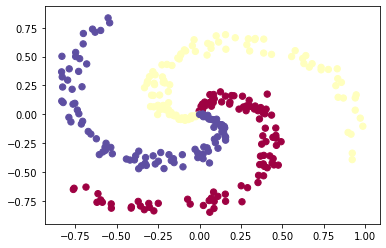

(300, 2)
(300, 3)


In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
inputs = np.zeros((N*K,D)) # data matrix (each row = single example)
targets = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    inputs[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    targets[ix] = j

# # lets visualize the data:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=40, cmap=plt.cm.Spectral)
plt.show()

one_hot = np.zeros([N*K ,K], dtype=np.int)
for i in range(len(targets)):
    one_hot[i][targets[i]] = 1 
targets = one_hot

print (inputs.shape)
print (targets.shape)

### Shuffling dataset

In [3]:
shuffle_indices = np.arange(len(inputs))
np.random.shuffle(shuffle_indices)

inputs = inputs[shuffle_indices]
targets = targets[shuffle_indices]

### Split the dataset

In [4]:
training_rate = .9

sample_count = len(inputs)
train_sample_count = int(training_rate * sample_count)

train_inputs  = inputs[0:train_sample_count]
train_targets = targets[0:train_sample_count]

test_inputs  = inputs[train_sample_count::]
test_targets = targets[train_sample_count::]

print(train_inputs.shape)
print(train_targets.shape)
print(test_inputs.shape)
print(test_targets.shape)

(270, 2)
(270, 3)
(30, 2)
(30, 3)


# Model

### Architecture :

In [24]:
inputs_units = 2
hidden_units = 100
outputs_units = 3

### Initialization : Xavier Glorot

In [26]:
W1 = np.random.randn(inputs_units ,hidden_units) / np.sqrt(inputs_units + hidden_units)
W2 = np.random.randn(hidden_units ,outputs_units) / np.sqrt(hidden_units + outputs_units)

b1 = np.zeros((1, hidden_units))
b2 = np.zeros((1, outputs_units))

### Train Model :

In [17]:
epochs = 500
batch_size = 5
learning_rate = .1

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds

num_examples = train_inputs.shape[0]

for i in range(epochs):
    for batch_index in range(0, num_examples, batch_size):
        if (batch_index + batch_size) > num_examples:
            inputs  = train_inputs[batch_index::]
            targets = train_targets[batch_index::]
        else:
            inputs  = train_inputs[batch_index:batch_index + batch_size]
            targets = train_targets[batch_index:batch_index + batch_size]
        
        hidden_layer =  np.dot(inputs, W1) + b1
        hidden_activation, hidden_deactivation = sigmoid(hidden_layer)
#         hidden_activation, hidden_deactivation = tanh(hidden_layer)
        
        output_layer =  np.dot(hidden_activation, W2) + b2
        output_activation, output_deactivation = sigmoid(output_layer)

        outputs = output_activation
        
        loss = np.sum(deltas ** 2) / 2 / batch_size
        
        deltas = outputs - targets

        doutput = deltas
        doutput *= output_deactivation

        dW2 = np.dot(hidden_activation.T, doutput)
        db2 = np.sum(doutput, axis=0, keepdims=True)

        dhidden = np.dot(doutput, W2.T)
        dhidden *= hidden_deactivation

        dW1 = np.dot(inputs.T, dhidden)
        db1 = np.sum(dhidden, axis=0, keepdims=True)
        
 

        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
    

    if i % 30 == 0:
        print ("iteration %d: loss %f" % (i, loss))

iteration 0: loss 0.014908
iteration 30: loss 0.009315
iteration 60: loss 0.009161
iteration 90: loss 0.009416
iteration 120: loss 0.009730
iteration 150: loss 0.009912
iteration 180: loss 0.009859
iteration 210: loss 0.009791
iteration 240: loss 0.009073
iteration 270: loss 0.008655
iteration 300: loss 0.008564
iteration 330: loss 0.007918
iteration 360: loss 0.006975
iteration 390: loss 0.006211
iteration 420: loss 0.005689
iteration 450: loss 0.005338
iteration 480: loss 0.005102


### Test Model :

In [18]:
inputs = test_inputs
targets = test_targets

num_examples = len(inputs)

hidden_layer =  np.dot(inputs, W1) + b1
hidden_activation = 1 / (1 + np.exp(-hidden_layer))

output_layer =  np.dot(hidden_activation, W2) + b2
output_activation = 1 / (1 + np.exp(-output_layer))
predictions = output_activation
 

for i in range(num_examples):
    print('Predictions: {} ----> Targets: {}'.format(np.round(predictions[i]), targets[i]))

Predictions: [1. 0. 0.] ----> Targets: [1 0 0]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [1. 0. 0.] ----> Targets: [1 0 0]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: [0. 0. 0.] ----> Targets: [0 0 1]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: [1. 0. 0.] ----> Targets: [1 0 0]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: [1. 0. 0.] ----> Targets: [1 0 0]
Predictions: [1. 0. 0.] ----> Targets: [1 0 0]
Predictions: [1. 0. 0.] ----> Targets: [1 0 0]
Predictions: [0. 0. 1.] ----> Targets: [0 0 1]
Predictions: [0. 1. 0.] ----> Targets: [0 1 0]
Predictions: 